In [5]:
import numpy
def energy(occupied):
    epsilon =-1
    U = 0
    for i, site1 in enumerate(occupied[:-1]): #all but the last!
        for site2 in occupied[i+1:]: #from the i+1th to the last!
        # Check nearest neighbor
        # Check if check if last site - first site are last value - 1 since all occupied are = 1
            if numpy.absolute(site1-site2)==1 or numpy.absolute(site1-site2)==V-1:
                U+=epsilon
    return U

def trial_move(occupied,lattice,T):
    Uo = energy(occupied)
    #pick a particle at random
    numpy.random.shuffle(occupied) #shuffles the elements of occupied
    old = occupied[0]
    #pick an EMPTY place at random to move it to
    empty_mask = numpy.isin(numpy.arange(V),occupied,invert=True)
    empty_sites = numpy.arange(V)[empty_mask] # list of empty sites
    new = empty_sites[numpy.random.randint(len(empty_sites))]
    occupied[0]= new
    #if energy down, accept
    Un = energy(occupied)
    #if energy up and random < boltzmann weight, accept
    if (Un<=Uo) or numpy.random.random() < numpy.exp(-(Un-Uo)/T):
        lattice[old] = 0
        lattice[new] = 1
        return occupied, lattice, Un
        #otherwise reject
    occupied[0]=old
    return occupied, lattice, Uo
    #make our MC simulation!

def run(nsteps,T,occupied, lattice):
    U = []
    for step in range(nsteps):
        occupied, lattice, u = trial_move(occupied, lattice,T)
        U.append(u)
        if step%50==0:
            print(step,u,lattice)
        # A solid will be defined as having all occupied sites touching. This is an instaneous view
        # this is a rigid definition without considering a liquid, but essentially we whould have to
        # define the atomic neighbors, or coordinate number if we really wanted to be specific
            if numpy.absolute(u) == len(occupied)-1:
                print('solid', T)
            else:
                print('gas', T)
    return numpy.array(U)/N

0 -1 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0.]
gas 0.185
50 -4 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
gas 0.185
100 -4 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
gas 0.185
150 -5 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
solid 0.185
200 -5 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
solid 0.185
250 -4 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
gas 0.185
300 -4 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
gas 0.185
350 -5 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
solid 0.185
400 -5 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
solid 0.185
450 -5 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
solid 0.185
-0.7606666666666666


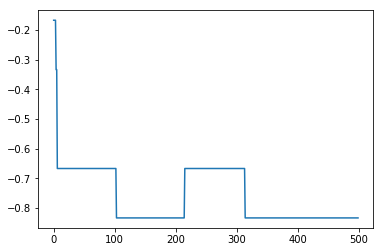

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
V = 25 #number of sites in our volume. MUST HAVE A INTEGER SQUARE ROOT
N = 6 # number of particles
lattice = numpy.zeros(V)#Initialize empty lattice
occupied = numpy.random.choice(V,N,replace=False)
for site in occupied:
    lattice[site] = 1
    
U = run(500,0.185,occupied,lattice,)
plt.plot(U)
print(numpy.average(U))

In [10]:
# 2D Simulation
# Initialize square nxn matrix,
i = int(numpy.sqrt(V))
Z = numpy.zeros(shape=(i,i))
# Randomly populate matrix
lattice_2d = numpy.reshape(lattice,(i,i))
print(occupied)
print(lattice_2d)
Q = numpy.random.shuffle(lattice_2d)
print(Q)
print(occupied)
# Essentially I'm trying to create
# an nxn matrix. Then I want to randomly occupy this matrix. Once that's done, I want to randomly shuffle them around.
# Energy minimizaion is odd on this route, but I think if we're looking for is accepting only arrangements in which
# nearest neighbors on rows will drop the energy levels. Same for neighbors on columns.


SyntaxError: invalid syntax (<ipython-input-10-51abdf8e837b>, line 13)

In [11]:
 # This script should be O(n^2). At its most basic, we are simply performing a nested loop in our energy function.
# Everything else feeds into this so its just O(n^2)


SyntaxError: invalid syntax (<ipython-input-11-51abdf8e837b>, line 13)

In [12]:
# To equilibrate, we should be able to save the u at each nstep. We will call this n_old.
# At a new nstep, once the atoms have been randomly moved, calculate the u_new.
# At this point, we can check for convergence. There are many ways to do this
# We might employ a Newton-Raphson technique or a Gradient Decent Method.This makes sense to me for clear cases
# of a solid convergence, but I'm not sure how I might call for an equilibration of a higher temperature simulation
# I think this might be more in line with statisitc and the variance of the data as the steps grow.


SyntaxError: invalid syntax (<ipython-input-12-e6e76d3deeee>, line 2)

In [ ]:
# The steps to equilibration could be defined as the point at which the variance of the data as steps increase
# has reached some tolerance that we could predefine. If we consider the root finding algos,
# the steps to equilibration occurs either at some tolerance of accuracy predefined.